# [6.2 Convolutions for Images](https://d2l.ai/chapter_convolutional-neural-networks/conv-layer.html)

<img src='./images/conv_operation.png' width='800'/>

&emsp; <sub>  * Image Credit : https://www.kaggle.com/manmohan291/57-cnn-basics

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
plt.rc('font', size=16)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

# load FashionMNIST training data
fmnist_train = datasets.FashionMNIST(
    root="../../../data", train=True, transform=transforms.ToTensor(), download=True)

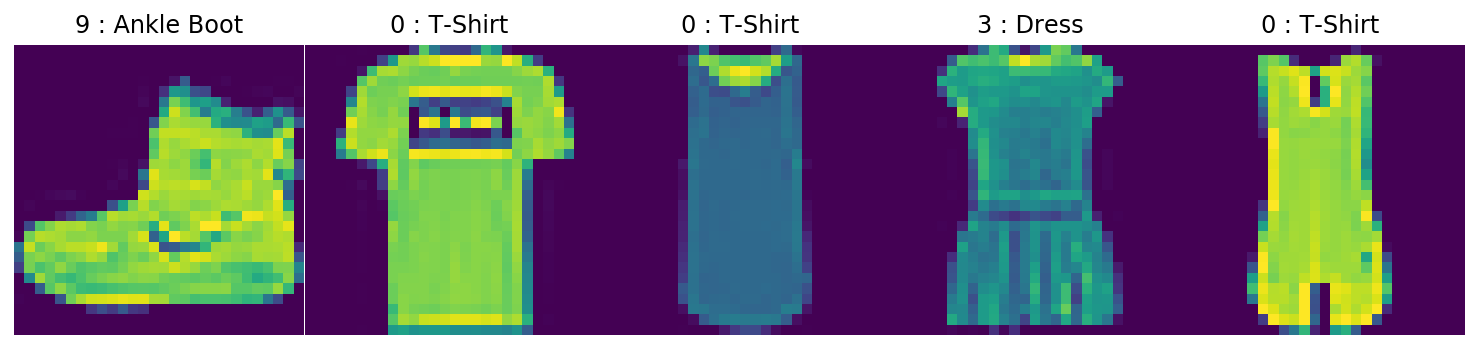

In [2]:
# display FashionMNIST images
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig, axes = plt.subplots(1, 5, figsize=(13, 4))
plt.subplots_adjust(hspace=0.001, wspace=0.001)

for i in range(5):
    image, label = fmnist_train.__getitem__(i)
    axes[i].imshow(image.squeeze().numpy())
    axes[i].set_title(f'{label} : {labels_map[label]}')
    axes[i].axis('off')

# Convolution of Images

- **Feature Map** : The feature map on CNN is the output of one filter applied to the previous layer.

- **Receptive Field** : All the elements (from all the previous layers) that may affect the calculation of a pixel.

<img src='./images/receptive_field.png' width='600'/>

&emsp; <sub>  * Image Credit : https://www.baeldung.com/cs/cnn-receptive-field-size

    
- Convolution layer in PyTorch: 
```
nn.Conv2d(
    in_channels: int,
    out_channels: int,
    kernel_size: Union[int, Tuple[int, int]],
    stride: Union[int, Tuple[int, int]] = 1,
    padding: Union[int, Tuple[int, int]] = 0,
    dilation: Union[int, Tuple[int, int]] = 1,
    groups: int = 1,
    bias: bool = True,
    padding_mode: str = 'zeros',
)
```

### Vertical Edge detection

In [3]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 3), bias=False)
print('>> randomly init conv2D weight:\n', conv2d.weight.data)

# filled_weight = torch.tensor([[1., 0., -1.], 
#                               [1., 0., -1.], 
#                               [1., 0., -1.]]).view(1, 1, 3,3)

filled_weight = torch.tensor([[-1., 2., -1.], 
                              [-1., 2., -1.], 
                              [-1., 2., -1.]]).view(1, 1, 3,3)

conv2d.weight.data = filled_weight

print('>> filled conv2D weight:\n', conv2d.weight.data)

>> randomly init conv2D weight:
 tensor([[[[ 0.1706, -0.3046,  0.1574],
          [ 0.2960, -0.1227,  0.3213],
          [ 0.3138, -0.1379,  0.0719]]]])
>> filled conv2D weight:
 tensor([[[[-1.,  2., -1.],
          [-1.,  2., -1.],
          [-1.,  2., -1.]]]])


In [4]:
imageID = 1
X, _ = fmnist_train.__getitem__(imageID)
outX = conv2d(X.unsqueeze(dim=0))

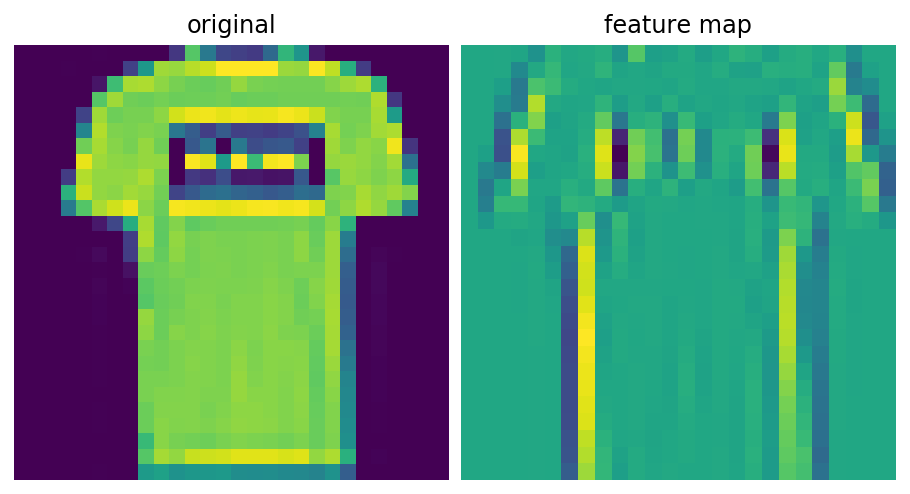

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(hspace=0.001, wspace=0.001)
axes[0].imshow(X.squeeze().numpy())
axes[1].imshow(outX.squeeze().detach().numpy())

axes[0].set_title('original')
axes[1].set_title('feature map')

for i in range(2):
    axes[i].axis('off')

### Horizontal Edge detection

In [6]:
# filled_weight = torch.tensor([[ 1.,  1.,  1.], 
#                               [ 0.,  0.,  0.], 
#                               [-1., -1., -1.]]).view(1, 1, 3,3)

filled_weight = torch.tensor([[-1., -1., -1.], 
                              [ 2.,  2.,  2.], 
                              [-1., -1., -1.]]).view(1, 1, 3,3)

conv2d.weight.data = filled_weight

print('>> filled conv2D weight:\n', conv2d.weight.data)

>> filled conv2D weight:
 tensor([[[[-1., -1., -1.],
          [ 2.,  2.,  2.],
          [-1., -1., -1.]]]])


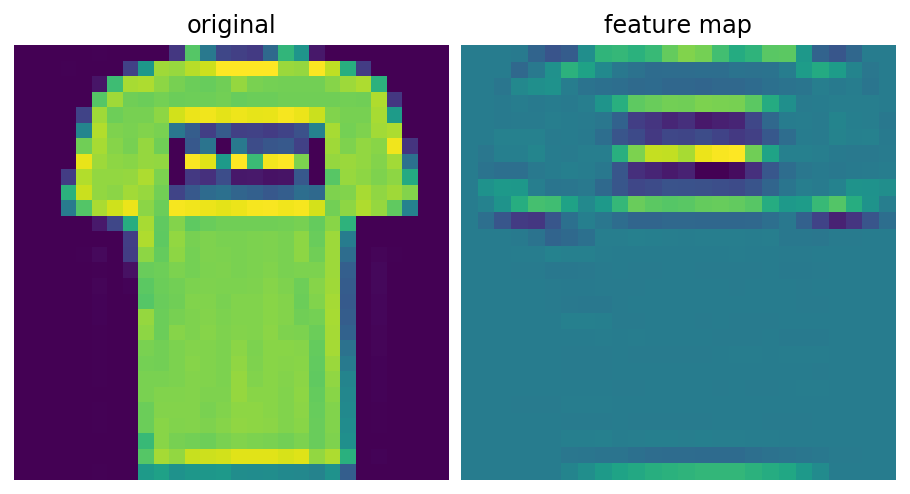

In [7]:
imageID = 1
X, _ = fmnist_train.__getitem__(imageID)
outX = conv2d(X.unsqueeze(dim=0))

### --- plot --- ###
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(hspace=0.001, wspace=0.001)
axes[0].imshow(X.squeeze().numpy())
axes[1].imshow(outX.squeeze().detach().numpy())

axes[0].set_title('original')
axes[1].set_title('feature map')

for i in range(2):
    axes[i].axis('off')

### Edge detection

In [8]:
filled_weight = torch.tensor([[-1.0, -1.0, -1.0], 
                              [-1.0,  8.0, -1.0], 
                              [-1.0, -1.0, -1.0]]).view(1, 1, 3,3)

conv2d.weight.data = filled_weight

print('>> filled conv2D weight:\n', conv2d.weight.data)

>> filled conv2D weight:
 tensor([[[[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]]]])


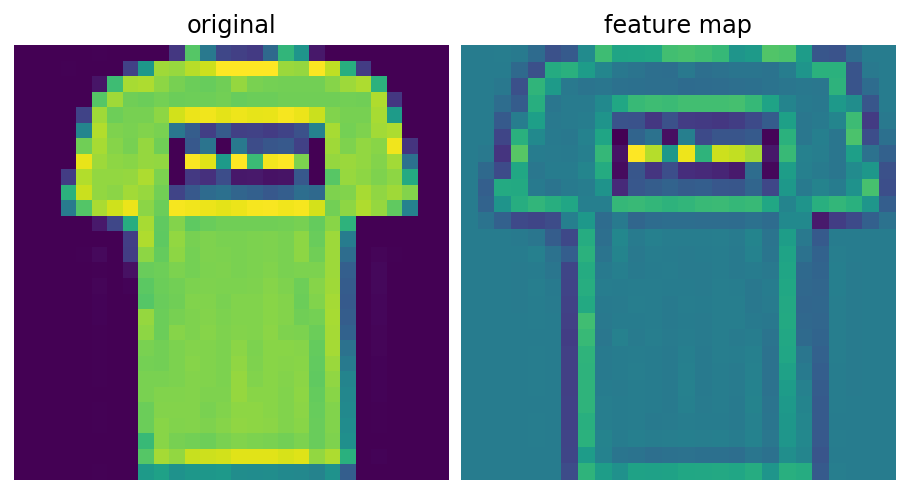

In [9]:
imageID = 1
X, _ = fmnist_train.__getitem__(imageID)
outX = conv2d(X.unsqueeze(dim=0))

### --- plot --- ###
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(hspace=0.001, wspace=0.001)
axes[0].imshow(X.squeeze().numpy())
axes[1].imshow(outX.squeeze().detach().numpy())

axes[0].set_title('original')
axes[1].set_title('feature map')

for i in range(2):
    axes[i].axis('off')

# [6.3 Padding and Stride](https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html)

#### Padding and stride can be used to adjust the dimensionality of the data effectively.

## Padding

- **n x n** images convolve with a **k x k** kernel → Output dimension = **(n-k+1) x (n-k+1)**
- **Padding** can increase the height and width of the output. This is often used to give the output the same height and width as the input.
- Padding helps to keep more of the information at the border of an image.
- **n x n** image + padding **p**, convolve with a **k x k** kernel → Output dimension = **(n+2p-k+1) x (n+2p-k+1)**

input  X.shape   :  torch.Size([1, 28, 28])
output outX.shape:  torch.Size([1, 1, 28, 28])


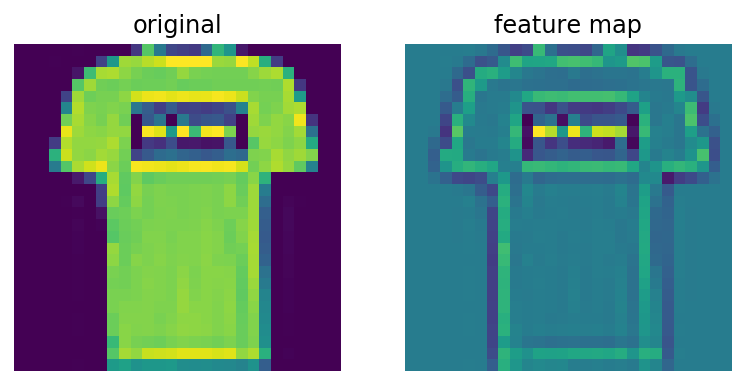

In [10]:
# Check the output dimension with a kernel_size = 3x3, padding = 1 on a 28x28 image

conv2d = nn.Conv2d(1, 1, kernel_size=(3, 3), bias=False, padding=1)

filled_weight = torch.tensor([[-1.0, -1.0, -1.0], 
                              [-1.0,  8.0, -1.0], 
                              [-1.0, -1.0, -1.0]]).view(1, 1, 3,3)

conv2d.weight.data = filled_weight


imageID = 1
X, _ = fmnist_train.__getitem__(imageID)
outX = conv2d(X.unsqueeze(dim=0))

print('input  X.shape   : ', X.shape)
print('output outX.shape: ', outX.shape)

### --- plot --- ###
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
plt.subplots_adjust(hspace=0.001, wspace=0.001)
axes[0].imshow(X.squeeze().numpy())
axes[1].imshow(outX.squeeze().detach().numpy())

axes[0].set_title('original')
axes[1].set_title('feature map')

for i in range(2):
    axes[i].axis('off')

## Stride

- For computational efficiency or because we wish to downsample, we move our window more than one element at a time, skipping the intermediate locations.

- **n x n** image + padding **p**, convolve with a **k x k** kernel, stride **s** → Output dimension = **(n+2p-k)/s + 1**

input  X.shape   :  torch.Size([1, 28, 28])
output outX.shape:  torch.Size([1, 1, 14, 14])


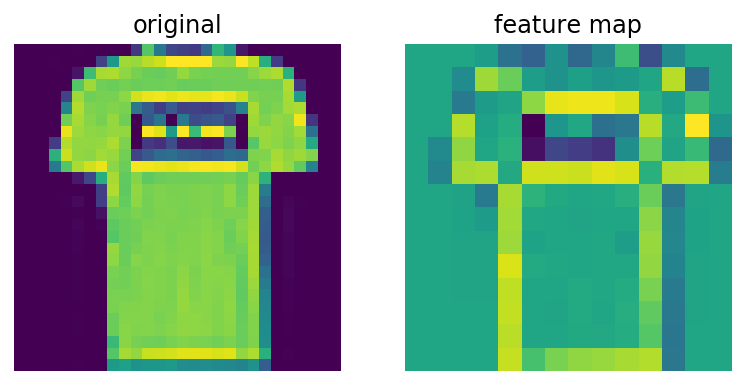

In [11]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 3), bias=False, padding=1, stride=2)

filled_weight = torch.tensor([[-1.0, -1.0, -1.0], 
                              [-1.0,  8.0, -1.0], 
                              [-1.0, -1.0, -1.0]]).view(1, 1, 3,3)

conv2d.weight.data = filled_weight


imageID = 1
X, _ = fmnist_train.__getitem__(imageID)
outX = conv2d(X.unsqueeze(dim=0))

print('input  X.shape   : ', X.shape)
print('output outX.shape: ', outX.shape)

### --- plot --- ###
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
plt.subplots_adjust(hspace=0.001, wspace=0.001)
axes[0].imshow(X.squeeze().numpy())
axes[1].imshow(outX.squeeze().detach().numpy())

axes[0].set_title('original')
axes[1].set_title('feature map')

for i in range(2):
    axes[i].axis('off')